<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa pixel về [0, 1]
data = ImageDataGenerator(rescale=1.0/255)
# Load ảnh từ thư mục -> batch
generator = data.flow_from_directory(
    '//content/drive/MyDrive/tien',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra
test_generator = data.flow_from_directory(
    '/content/drive/MyDrive/tien',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
X_batch, y_batch = next(generator)
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)


x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test))

Found 96 images belonging to 10 classes.
Found 96 images belonging to 10 classes.
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.8559 - val_accuracy: 0.0833 - val_loss: 2.9274
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1562 - loss: 2.5885 - val_accuracy: 0.1146 - val_loss: 2.8834
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.1875 - loss: 2.5785 - val_accuracy: 0.1354 - val_loss: 2.5225
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2188 - loss: 2.2699 - val_accuracy: 0.1250 - val_loss: 2.3569
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2188 - loss: 2.0890 - val_accuracy: 0.1875 - val_loss: 2.4159
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3750 - loss: 2.0684 - val_accuracy: 0.1354 - val_loss: 2.3837
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.2812 - loss: 1.9824 - val_accuracy: 0.2188 - val_loss: 2.3021
Epoch 8/1000
1/1 ━━━━━━

In [36]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5221 - loss: 2.5872
test_acc:55.21


In [34]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4401 - loss: 3.0663
test_acc:45.83


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dự đoán là: 5000d


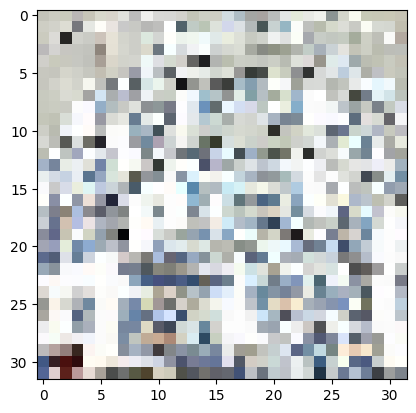

In [44]:
image_path = '/content/drive/MyDrive/tien/5000d/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Dự đoán là: 500d


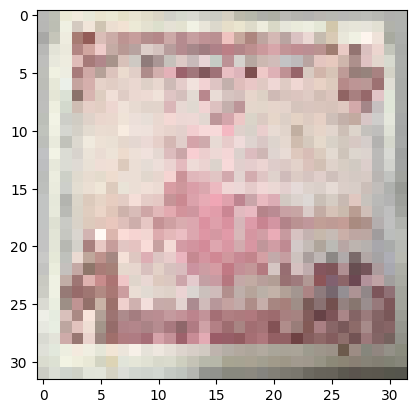

In [45]:
image_path = '/content/drive/MyDrive/tien/500d/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dự đoán là: 500k


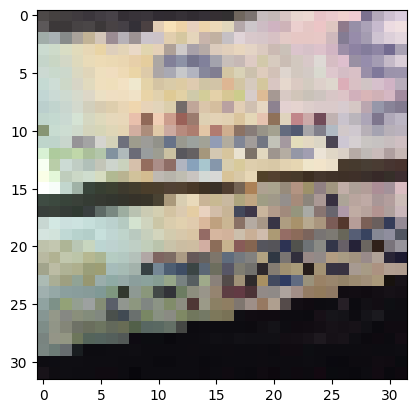

In [46]:
image_path = '/content/drive/MyDrive/tien/500k/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dự đoán là: 50k


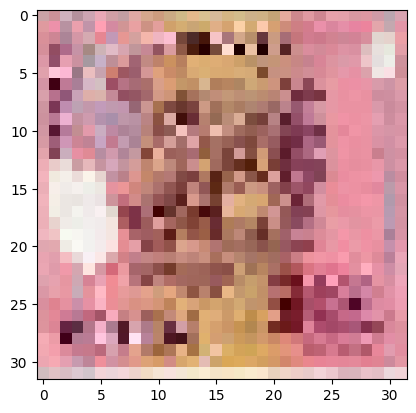

In [49]:
image_path = '/content/drive/MyDrive/tien/50k/t1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán là: 2000d


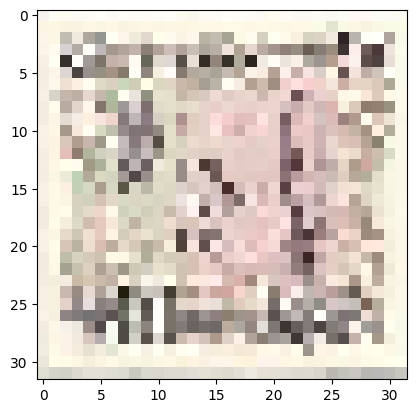

In [52]:
image_path = '/content/drive/MyDrive/tien/2000d/t2.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán là: 20k


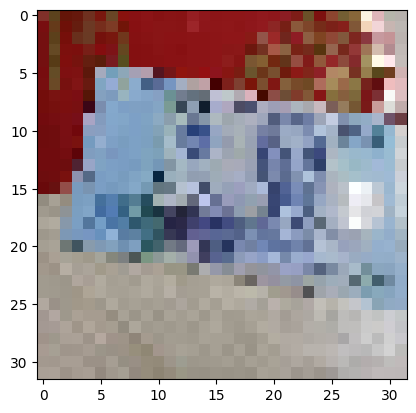

In [53]:
image_path = '/content/drive/MyDrive/tien/20k/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Dự đoán là: 200k


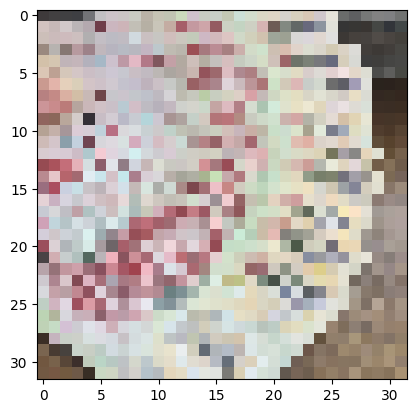

In [56]:
image_path = '/content/drive/MyDrive/tien/200k/t1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán là: 1000d


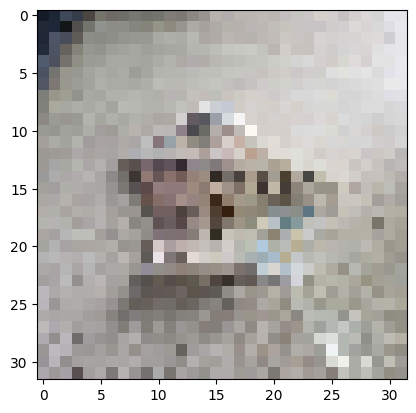

In [58]:
image_path = '/content/drive/MyDrive/tien/1000d/t4.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán là: 10k


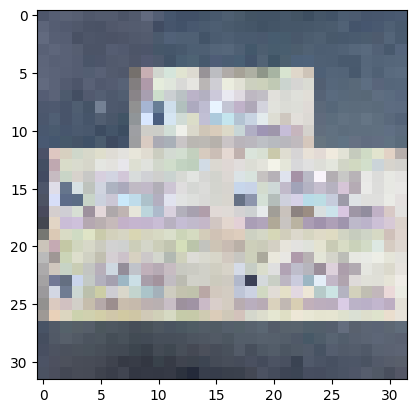

In [59]:
image_path = '/content/drive/MyDrive/tien/10k/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán là: 100k


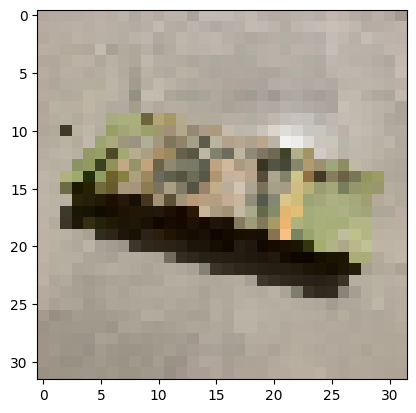

In [60]:
image_path = '/content/drive/MyDrive/tien/100k/t9.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])